In [26]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.decomposition import PCA
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', None)

In [28]:
script_dir = Path.cwd()

baseTablePath = script_dir.parent.parent/"data"/"analysis_base_clean.csv"
df = pd.read_csv(baseTablePath)

In [29]:
df.drop(columns=['bmx_weight_kg','bmx_height_cm','bmx_waist_cm','bmx_hip_cm','mcq220', 'dpq_severity','hscrp_flag_acute'], inplace = True)

In [30]:
df.loc[df['dpq_total'].isna() & df['dpq_cat'].notna(), 'dpq_cat'] = np.nan
df.loc[df['hscrp_mg_l_raw'].isna() & df['hscrp_cat'].notna(), 'hscrp_cat'] = np.nan
df.loc[df['race_eth'].isna(),'race_eth']= 5.0

In [31]:
df.head()

,seqn,age_years,age_group,sex,race_eth,educ_level,pir,ever_cancer,dpq_total,dpq_cat,smoke_status,hscrp_mg_l_raw,hscrp_cat,bmx_bmi
0,130379,66.0,60+,1,3.0,5.0,5.00,1,1.0,none-minimal,former,2.03,average,33.5
1,130380,44.0,40-49,2,2.0,3.0,1.41,0,2.0,none-minimal,never,5.62,high,29.7
2,130386,34.0,30-39,1,1.0,4.0,1.33,0,1.0,none-minimal,former,1.05,average,30.2
3,130388,27.0,18-29,2,4.0,4.0,0.81,0,NaN,NaN,current,NaN,NaN,43.7
4,130390,31.0,30-39,2,3.0,3.0,2.16,0,NaN,NaN,never,11.20,high,46.0


Gender:
1-male
2-female

race_eth:
1-Hispanic-american
2- hispanic-other
3-NHW
4-NHB
5-Other

educ_level:
1-Less than 9th
2-9-11
3-high school
4-AA degree
5-graduate or above

In [36]:
df['hscrp_mg_l_raw'].describe()

count    5587.000000
mean        3.884706
std         7.418410
min         0.110000
25%         0.820000
50%         1.820000
75%         4.200000
max       150.920000
Name: hscrp_mg_l_raw, dtype: float64

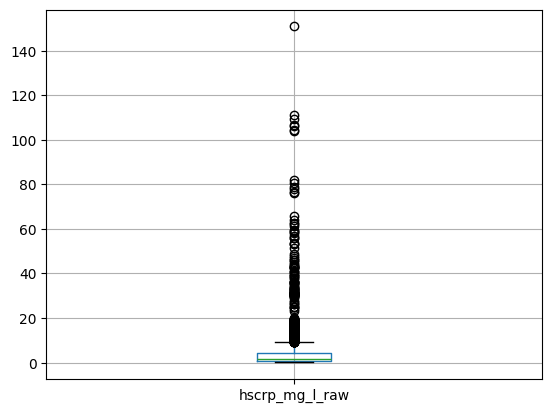

In [38]:
df.boxplot(column=['hscrp_mg_l_raw'],return_type='axes');


In [47]:
df.to_csv('preprocessed_data.csv')